In [1]:
import pandas as pd
import numpy as np
import collections

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy
import math
import random
import sklearn
import string

import nltk
from nltk.corpus import stopwords #Manually download
#nltk.download("stopwords")

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from util import rmse
from util import ndcg_k
from util import divSco_k
from util import gettail

from mf import MF

MIN_WORD_COUNT = 15
# #MODEL = "GaussianNB"
# MODEL = "MultinomialNB"

reallyfinalbooks = pd.read_csv('reallyfinalbooks.csv')
reallyfinalratings = pd.read_csv('reallyfinalratings.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

traintable = pd.pivot_table(data=train, index="newuser_id", columns="newbook_id", values="rating").sort_index(axis=0).sort_index(axis=1)
testtable = pd.pivot_table(data=test, index="newuser_id", columns="newbook_id", values="rating").sort_index(axis=0).sort_index(axis=1)

tail = gettail(reallyfinalratings)

In [2]:
R = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4],
])
mf = MF(R, K=2, alpha=0.1, beta=0.01, iterations=30)
training_process = mf.train()

Iteration: 0 ; train_rmse = 1.6057 ; val_rmse = 0.0000	time cost 0.007978200912475586 s
Iteration: 1 ; train_rmse = 1.4594 ; val_rmse = 0.0000	time cost 0.0 s
Iteration: 2 ; train_rmse = 1.2832 ; val_rmse = 0.0000	time cost 0.000997304916381836 s
Iteration: 3 ; train_rmse = 1.1150 ; val_rmse = 0.0000	time cost 0.0 s
Iteration: 4 ; train_rmse = 0.9778 ; val_rmse = 0.0000	time cost 0.0009975433349609375 s
Iteration: 5 ; train_rmse = 0.8831 ; val_rmse = 0.0000	time cost 0.0009975433349609375 s
Iteration: 6 ; train_rmse = 0.7901 ; val_rmse = 0.0000	time cost 0.0009968280792236328 s
Iteration: 7 ; train_rmse = 0.6921 ; val_rmse = 0.0000	time cost 0.0 s
Iteration: 8 ; train_rmse = 0.6090 ; val_rmse = 0.0000	time cost 0.000995635986328125 s
Iteration: 9 ; train_rmse = 0.5332 ; val_rmse = 0.0000	time cost 0.0 s
Iteration: 10 ; train_rmse = 0.4637 ; val_rmse = 0.0000	time cost 0.0 s
Iteration: 11 ; train_rmse = 0.3211 ; val_rmse = 0.0000	time cost 0.0009982585906982422 s
Iteration: 12 ; train_r

In [3]:
print(mf.P)
print(mf.Q)
print(mf.full_matrix())

[[-0.87725154  0.41641193]
 [-0.42830837  0.65602007]
 [ 1.31552397 -0.47633654]
 [ 0.75971188 -0.93275106]
 [ 1.31977834  0.19849963]]
[[-1.5234474   0.34277872]
 [-0.61747602  0.3681108 ]
 [ 0.84624974  0.72605417]
 [ 1.48776525 -1.16305946]]
[[ 4.98597815  3.00025572  3.82269377  1.01222023]
 [ 3.99589963  2.42297663  3.9883105   1.01319397]
 [ 1.01825616  0.9965104   4.70901706  4.99174633]
 [ 1.00582188  0.46896435  3.20454397  3.99293006]
 [ 1.02776182  1.02696541  4.98725243  3.99786874]]


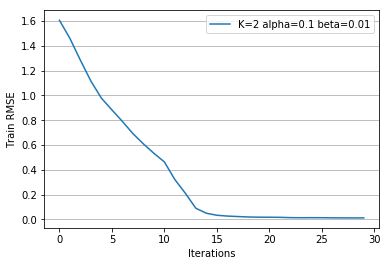

In [4]:
x = [x for x, y, _ in training_process]
y = [y for x, y, _ in training_process]
plt.plot(x, y, label="K={} alpha={} beta={}".format(mf.K, mf.alpha, mf.beta))
plt.xlabel("Iterations")
plt.ylabel("Train RMSE")
plt.grid(axis="y")
plt.legend()

In [5]:
np.random.seed(10)
k2train_process = {}
for k in range(1, 8):
    print(k)
    mf = MF(traintable.fillna(0).values, K=k, alpha=0.1, beta=0.1, iterations=25, val_size=0.20, decay_rate=0.95)
    training_process = mf.train()
    k2train_process[k] = training_process

1
Iteration: 0 ; train_rmse = 0.8801 ; val_rmse = 0.8976	time cost 24.26374053955078 s
Iteration: 1 ; train_rmse = 0.8773 ; val_rmse = 0.8952	time cost 23.365702629089355 s
Iteration: 2 ; train_rmse = 0.8722 ; val_rmse = 0.8913	time cost 22.76918649673462 s
Iteration: 3 ; train_rmse = 0.8700 ; val_rmse = 0.8905	time cost 24.5285747051239 s
Iteration: 4 ; train_rmse = 0.8649 ; val_rmse = 0.8871	time cost 23.656394958496094 s
Iteration: 5 ; train_rmse = 0.8627 ; val_rmse = 0.8862	time cost 23.30716347694397 s
Iteration: 6 ; train_rmse = 0.8588 ; val_rmse = 0.8828	time cost 23.188335180282593 s
Iteration: 7 ; train_rmse = 0.8559 ; val_rmse = 0.8797	time cost 23.041532516479492 s
Iteration: 8 ; train_rmse = 0.8542 ; val_rmse = 0.8785	time cost 22.932008504867554 s
Iteration: 9 ; train_rmse = 0.8518 ; val_rmse = 0.8772	time cost 23.0914089679718 s
Iteration: 10 ; train_rmse = 0.8503 ; val_rmse = 0.8746	time cost 22.977593660354614 s
Iteration: 11 ; train_rmse = 0.8482 ; val_rmse = 0.8735	ti

Iteration: 20 ; train_rmse = 0.8021 ; val_rmse = 0.8629	time cost 25.62920880317688 s
Iteration: 21 ; train_rmse = 0.8010 ; val_rmse = 0.8618	time cost 25.65220332145691 s
Iteration: 22 ; train_rmse = 0.8001 ; val_rmse = 0.8617	time cost 25.293655157089233 s
Iteration: 23 ; train_rmse = 0.7998 ; val_rmse = 0.8612	time cost 25.741322994232178 s
Iteration: 24 ; train_rmse = 0.7987 ; val_rmse = 0.8601	time cost 25.593790769577026 s
5
Iteration: 0 ; train_rmse = 0.8743 ; val_rmse = 0.9046	time cost 27.160832405090332 s
Iteration: 1 ; train_rmse = 0.8622 ; val_rmse = 0.8966	time cost 25.586594343185425 s
Iteration: 2 ; train_rmse = 0.8537 ; val_rmse = 0.8948	time cost 25.661022424697876 s
Iteration: 3 ; train_rmse = 0.8449 ; val_rmse = 0.8917	time cost 27.038299560546875 s
Iteration: 4 ; train_rmse = 0.8365 ; val_rmse = 0.8881	time cost 27.15660333633423 s
Iteration: 5 ; train_rmse = 0.8299 ; val_rmse = 0.8851	time cost 26.28824472427368 s
Iteration: 6 ; train_rmse = 0.8249 ; val_rmse = 0.8

In [14]:
xs = list(k2train_process.keys())
train_ys = []
val_ys = []
for x in xs:
    train_ys.append(k2train_process[x][-1][1])
    val_ys.append(k2train_process[x][-1][2])

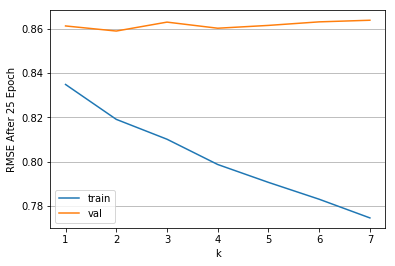

In [19]:
plt.plot(xs, train_ys, label="train")
plt.plot(xs, val_ys, label="val")
plt.xlabel("k")
plt.ylabel("RMSE After 25 Epoch")
plt.grid(axis="y")
plt.legend()

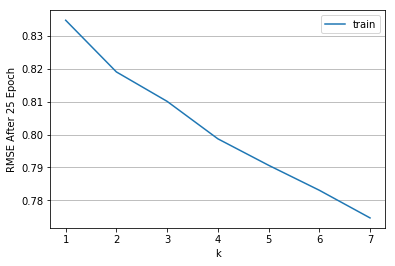

In [32]:
plt.plot(xs, train_ys, label="train")
plt.xlabel("k")
plt.ylabel("RMSE After 25 Epoch")
plt.grid(axis="y")
plt.legend()

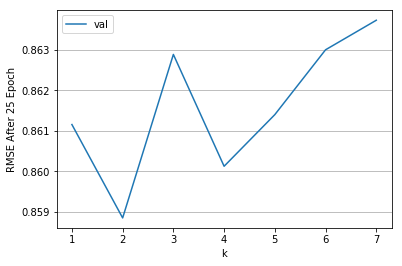

In [33]:
plt.plot(xs, val_ys, label="val")
plt.xlabel("k")
plt.ylabel("RMSE After 25 Epoch")
plt.grid(axis="y")
plt.legend()

In [47]:
val_list_ys = []
for x in xs:
    l = []
    for _, train, _ in k2train_process[x]:
        l.append(train)
    val_list_ys.append(l)

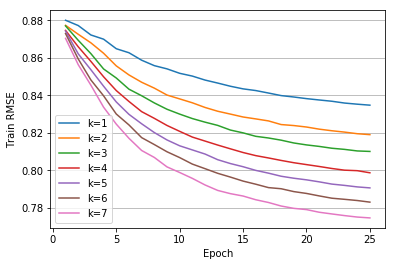

In [49]:
for i in range(len(xs)):
    plt.plot(range(1, len(val_list_ys[0])+1), val_list_ys[i], label="k={}".format(xs[i]))
    plt.xlabel("Epoch")
    plt.ylabel("Train RMSE")
    plt.grid(axis="y")
    plt.legend()

In [50]:
val_list_ys = []
for x in xs:
    l = []
    for _, _, val in k2train_process[x]:
        l.append(val)
    val_list_ys.append(l)

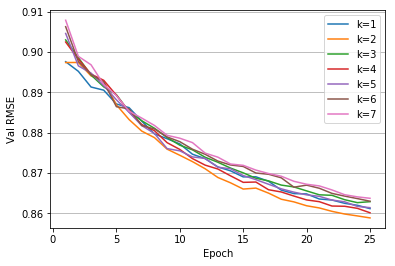

In [51]:
for i in range(len(xs)):
    plt.plot(range(1, len(val_list_ys[0])+1), val_list_ys[i], label="k={}".format(xs[i]))
    plt.xlabel("Epoch")
    plt.ylabel("Val RMSE")
    plt.grid(axis="y")
    plt.legend()